In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [101]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv', index_col=0)
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...
206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [102]:
df.shape

(205843, 6)

In [103]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [104]:
print("Duplicated rows - " ,len(df[df.duplicated()]))

df.drop_duplicates(inplace=True)

print("After removing Duplicated rows - " ,len(df[df.duplicated()]))

Duplicated rows -  33
After removing Duplicated rows -  0


In [105]:
print("No. of unique job postings -- " , df['job_position'].nunique())
print("No. of Applicants -- ", df['email_hash'].nunique())
print("No. of Companies -- ", df['company_hash'].nunique())

No. of unique job postings --  1017
No. of Applicants --  153443
No. of Companies --  37299


In [106]:
## Top Job Positions by frequency
df['job_position'].value_counts().reset_index().head(10)

,index,job_position
0,Backend Engineer,43546
1,FullStack Engineer,24711
2,Other,18071
3,Frontend Engineer,10417
4,Engineering Leadership,6870
5,QA Engineer,6587
6,Data Scientist,5367
7,Android Engineer,5356
8,SDET,4967
9,Devops Engineer,4612


In [107]:
# Top 10 profiles with most Job positions
df['email_hash'].value_counts().reset_index().head(10).iloc[9]

index         4818edfd67ed8563dde5d083306485d91d19f4f1c95d19...
email_hash                                                    8
Name: 9, dtype: object

In [108]:
display(df[df['email_hash'] == 'bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b'])
display(df[df['email_hash'] == '6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Support Engineer,2020.0
72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Other,2020.0
103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,FullStack Engineer,2020.0
118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,Data Analyst,2020.0
121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Other,2019.0
124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Support Engineer,2019.0
145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,FullStack Engineer,2019.0
153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,Devops Engineer,2019.0
160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
9859,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,QA Engineer,2020.0
10006,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Devops Engineer,2020.0
10587,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Backend Engineer,2020.0
12793,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,Other,2020.0
20729,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2400000,SDET,2020.0
138731,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,SDET,2020.0
159887,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Devops Engineer,2020.0
166040,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Other,2020.0
179593,ihvrwgbb,6842660273f70e9aa239026ba33bfe82275d6ab0d20124...,2017.0,2000000,Backend Engineer,2020.0


That's too many position changes in the same company in the same year, which is not possible. Let's take the first entry to lessen the confusion

In [110]:
df = df.groupby('email_hash').first().reset_index()

In [111]:
df.shape

(153443, 6)

In [112]:
df.describe(include='all')

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
count,153443,153411,153365.000000,1.534430e+05,133219,153443.000000
unique,153443,36339,NaN,NaN,821,NaN
top,00003288036a44374976948c327f246fdbdf0778546904...,nvnv wgzohrnvzwj otqcxwto,NaN,NaN,Backend Engineer,NaN
freq,1,5251,NaN,NaN,37313,NaN
mean,NaN,NaN,2014.535696,2.517375e+06,NaN,2019.470592
std,NaN,NaN,73.072657,1.311281e+07,NaN,1.367097
min,NaN,NaN,0.000000,2.000000e+00,NaN,2015.000000
25%,NaN,NaN,2013.000000,5.500000e+05,NaN,2019.000000
50%,NaN,NaN,2016.000000,9.699990e+05,NaN,2020.000000
75%,NaN,NaN,2018.000000,1.700000e+06,NaN,2021.000000


Feature Engineering

In [113]:
df.isna().sum()

email_hash              0
company_hash           32
orgyear                78
ctc                     0
job_position        20224
ctc_updated_year        0
dtype: int64

In [114]:
df['Years of Experience'] = abs(df['ctc_updated_year'] - df['orgyear'])

In [115]:
df.isna().sum()

email_hash                 0
company_hash              32
orgyear                   78
ctc                        0
job_position           20224
ctc_updated_year           0
Years of Experience       78
dtype: int64

In [116]:
from sklearn.impute import KNNImputer

cols_with_missing = ['Years of Experience']

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  

# Perform imputation on the selected columns
df_filled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
df_filled[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

# Display the DataFrame after imputation
print(df_filled.isna().sum())


email_hash                 0
company_hash              32
orgyear                   78
ctc                        0
job_position           20224
ctc_updated_year           0
Years of Experience        0
dtype: int64


In [118]:
def remove_outliers_iqr(df, column_name, lower_bound=None, upper_bound=None):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    if lower_bound is None:
        lower_bound = Q1 - 1.5 * IQR
    if upper_bound is None:
        upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows based on the specified column and bounds
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [119]:
df_fr = remove_outliers_iqr(df_filled, 'ctc')

In [127]:
df_fr = remove_outliers_iqr(df_fr, 'Years of Experience')

<Axes: xlabel='ctc', ylabel='Count'>

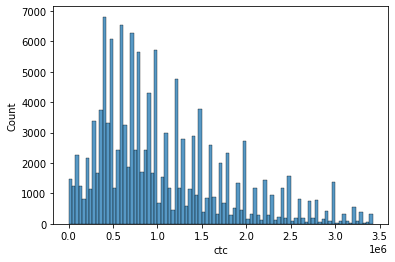

In [128]:
sns.histplot(df_fr['ctc'])


<Axes: xlabel='Years of Experience', ylabel='Count'>

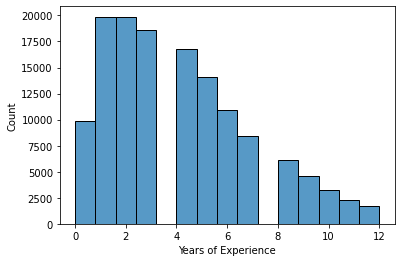

In [131]:
sns.histplot(df_fr['Years of Experience'], bins =15)

In [138]:

# Step 1: Compute the 5-point summary based on groupings
grouped_summary = df.groupby(['company_hash', 'job_position', 'Years of Experience'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()
grouped_summary.columns = ['company_hash', 'job_position', 'Years of Experience', 'CTC_mean', 'CTC_median', 'CTC_max', 'CTC_min', 'CTC_count']

# Step 2: Merge the summary back into the original dataset
merged_df = pd.merge(df, grouped_summary, on=['company_hash', 'job_position', 'Years of Experience'], how='left')

# Step 3: Create flags based on CTC comparisons
def compare_ctc(row):
    if row['ctc'] > row['CTC_mean']:
        return 1
    elif row['ctc'] == row['CTC_mean']:
        return 2
    else:
        return 3

merged_df['designation_flag'] = merged_df.apply(compare_ctc, axis=1)

merged_df

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,Years of Experience,CTC_mean,CTC_median,CTC_max,CTC_min,CTC_count,designation_flag
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,Backend Engineer,2019.0,7.0,3.163229e+06,2855000.0,6000000.0,53000.0,35.0,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,Backend Engineer,2020.0,7.0,2.500000e+05,250000.0,250000.0,250000.0,1.0,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,FullStack Engineer,2019.0,2.0,1.133636e+06,950000.0,2200000.0,500000.0,11.0,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004.0,2000000,FullStack Engineer,2021.0,17.0,2.000000e+06,2000000.0,2000000.0,2000000.0,1.0,2
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,None,2018.0,9.0,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153438,fffc254e627e4bd1bc0ed7f01f9aebbba7c3cc56ac914e...,tqxwoogz ogenfvqt wvbuho,2004.0,3529999,QA Engineer,2019.0,15.0,3.529999e+06,3529999.0,3529999.0,3529999.0,1.0,2
153439,fffcf97db1e9c13898f4eb4cd1c2fe862358480e104535...,trnqvcg,2015.0,1600000,None,2018.0,3.0,NaN,NaN,NaN,NaN,NaN,3
153440,fffe7552892f8ca5fb8647d49ca805b72ea0e9538b6b01...,znn avnv srgmvr atrxctqj otqcxwto,2014.0,900000,Devops Engineer,2019.0,5.0,7.166667e+05,650000.0,900000.0,600000.0,3.0,1
153441,ffff49f963e4493d8bbc7cc15365423d84a767259f7200...,zwq wgqugqvnxgz,2020.0,700000,FullStack Engineer,2020.0,0.0,1.800000e+06,700000.0,4000000.0,700000.0,3.0,3
